In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
#url = 'OnlineNewsPopularity.csv'
popularity = pd.read_csv('OnlineNewsPopularity.csv')
popularity.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
#list(popularity.columns)
popularity.columns

Index([u'url', u'timedelta', u'n_tokens_title', u'n_tokens_content',
       u'n_unique_tokens', u'n_non_stop_words', u'n_non_stop_unique_tokens',
       u'num_hrefs', u'num_self_hrefs', u'num_imgs', u'num_videos',
       u'average_token_length', u'num_keywords', u'data_channel_is_lifestyle',
       u'data_channel_is_entertainment', u'data_channel_is_bus',
       u'data_channel_is_socmed', u'data_channel_is_tech',
       u'data_channel_is_world', u'kw_min_min', u'kw_max_min', u'kw_avg_min',
       u'kw_min_max', u'kw_max_max', u'kw_avg_max', u'kw_min_avg',
       u'kw_max_avg', u'kw_avg_avg', u'self_reference_min_shares',
       u'self_reference_max_shares', u'self_reference_avg_sharess',
       u'weekday_is_monday', u'weekday_is_tuesday', u'weekday_is_wednesday',
       u'weekday_is_thursday', u'weekday_is_friday', u'weekday_is_saturday',
       u'weekday_is_sunday', u'is_weekend', u'LDA_00', u'LDA_01', u'LDA_02',
       u'LDA_03', u'LDA_04', u'global_subjectivity',
       u'global_sen

In [4]:
popularity.shape

(39644, 61)

In [5]:
popularity.dtypes.value_counts()

float64    34
int64      26
object      1
dtype: int64

In [6]:
popularity.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
popularity.isnull().sum().any()

False

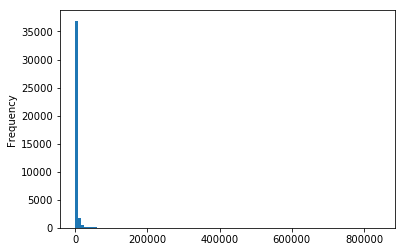

In [8]:
popularity.shares.plot(kind = 'hist', bins = 100);

In [9]:
#CODE CREDIT: http://stackoverflow.com/questions/11882393/
#matplotlib-disregard-outliers-when-plotting
#http://stackoverflow.com/users/325565/joe-kington
#thresh : The modified z-score to use as a threshold. Observations with
#a modified z-score (based on the MEDIAN ABSOLUTE DEVIATION) greater
#than this value will be classified as outliers.
def is_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

BE ADVISED: Scales are significantly different.


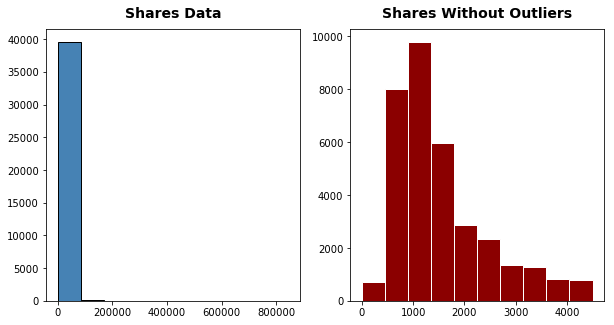

In [10]:
print('BE ADVISED: Scales are significantly different.')
x = popularity.shares
filtered = x[~is_outlier(x)]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.hist(x, color="#4682B4", edgecolor="#000000")
ax1.set_title('Shares Data', y=1.02,
              fontsize=14, fontweight='bold')
ax2.hist(filtered, color='#8B0000', edgecolor="#FFFFFF")
ax2.set_title('Shares Without Outliers', y=1.02,
              fontsize=14, fontweight='bold')
plt.show()
plt.savefig('Shares_using_MAD.png');

In [11]:
print('Mean of the shares column:   {0}'.format(round(popularity.shares.mean(),2)))
print('Median of the shares column: {0}'.format(popularity.shares.median()))
print('\nMax value in the shares column {:,}'.format(popularity.shares.max()))

Mean of the shares column:   3395.38
Median of the shares column: 1400.0

Max value in the shares column 843,300


Populatory Shares appears to be a right-skewed distribution (mean to the right of the median) with quite a long right tail. 

In [12]:
print("Skewness of popularity shares: {}".format(popularity.shares.skew()))
print("Kurtosis of popularity shares: {}".format(popularity.shares.kurt()))

Skewness of popularity shares: 33.9638848757
Kurtosis of popularity shares: 1832.67265716


In [14]:
from scipy import stats
print("99th percentile: {0:,.0f}"
      .format(stats.scoreatpercentile(popularity.shares, 99)))
print("95th percentile: {0:,.0f}"
      .format(stats.scoreatpercentile(popularity.shares, 95)))
print("90th percentile: {0:,.0f}"
      .format(stats.scoreatpercentile(popularity.shares, 90)))

99th percentile: 31,657
95th percentile: 10,800
90th percentile: 6,200


In [15]:
popularity[popularity.shares > 600000]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
3145,http://mashable.com/2013/03/02/wealth-inequality/,677,11,382,0.487805,1.0,0.605809,15,3,11,...,0.033333,0.7,-0.277778,-0.433333,-0.20,0.000000,0.000000,0.500000,0.000000,617900
5370,http://mashable.com/2013/04/15/dove-ad-beauty-...,633,11,893,0.517202,1.0,0.716730,17,11,0,...,0.033333,1.0,-0.348674,-1.000000,-0.10,0.000000,0.000000,0.500000,0.000000,690400
9365,http://mashable.com/2013/07/03/low-cost-iphone/,554,12,688,0.500734,1.0,0.643357,28,3,15,...,0.050000,1.0,-0.217593,-0.400000,-0.05,0.100000,-0.300000,0.400000,0.300000,843300
16268,http://mashable.com/2013/11/18/kanye-west-harv...,416,9,134,0.689394,1.0,0.851852,1,1,0,...,0.100000,0.5,-0.700000,-1.000000,-0.40,0.000000,0.000000,0.500000,0.000000,652900
23237,http://mashable.com/2014/04/09/first-100-gilt-...,274,13,2591,0.237708,1.0,0.371091,27,4,1,...,0.033333,0.8,-0.315761,-0.500000,-0.05,0.535714,0.285714,0.035714,0.285714,663600


# Bining the response variable "shares" into popular and not popular

In [16]:
bins = [0, 1400, 843300]

In [17]:
group_names = ['Not Popular','Popular']

In [18]:
Categories = pd.cut(popularity['shares'], bins, labels=group_names)

popularity['Categories'] = pd.cut(popularity['shares'], bins, labels=group_names)

Categories[:10]

0    Not Popular
1    Not Popular
2        Popular
3    Not Popular
4    Not Popular
5    Not Popular
6    Not Popular
7    Not Popular
8        Popular
9    Not Popular
Name: shares, dtype: category
Categories (2, object): [Not Popular < Popular]

In [19]:
popularity.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Categories
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Not Popular
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Not Popular
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Not Popular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Not Popular


In [20]:
popularity['shares_dummy'] = popularity.Categories.map({'Not Popular':0, 'Popular':1})

In [22]:
print(popularity.shares_dummy.value_counts())
print(popularity.shares_dummy.value_counts(normalize=True))*100

0    20082
1    19562
Name: shares_dummy, dtype: int64
0    50.655837
1    49.344163
Name: shares_dummy, dtype: float64


In [23]:
popularity.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Categories,shares_dummy
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Not Popular,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Not Popular,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Not Popular,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Not Popular,0


In [24]:
popularity.drop(['url','Categories','shares','timedelta'], axis=1, inplace=True)

In [25]:
popularity.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_dummy
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


# Conduct a Logistic Regression on predicting whether a Mashable news article will be popular or not

In [26]:
'''X = popularity['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens',
              'num_hrefs','num_self_hrefs','num_imgs','num_videos','average_token_length','num_keywords',
              'data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
              'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','kw_min_min','kw_max_min',
              'kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg'
              ,'self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess','weekday_is_monday'
              ,'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday',
              'weekday_is_sunday','is_weekend','LDA_00','LDA_01','LDA_02','LDA_03','LDA_04','global_subjectivity','global_sentiment_polarity',
              'global_rate_positive_words','global_rate_negative_words','rate_positive_words','rate_negative_words',
              'avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity',
              'min_negative_polarity','max_negative_polarity','title_subjectivity','title_sentiment_polarity',
              'abs_title_subjectivity','abs_title_sentiment_polarity']'''
X = popularity.loc[:, popularity.columns != 'shares_dummy']
y = popularity['shares_dummy'] 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_pred = logreg.predict(X_test)
len(y_pred)

9911

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
print accuracy_score(y_test,y_pred)

0.603369992937


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3317 1666]
 [2265 2663]]


In [32]:
print 'The Coefficients: \n{0}\n'.format(logreg.coef_)
print 'The Intercept: {0}'.format(logreg.intercept_)

The Coefficients: 
[[ -2.64508846e-04   2.29384701e-04   1.22975527e-05   2.22816019e-05
    6.52071035e-06   4.38342691e-04   1.08071189e-05   8.17518573e-05
   -1.45021542e-04  -1.08564956e-04  -2.65339402e-05  -4.67179175e-07
   -5.97708586e-05   7.16036678e-06   2.65960819e-05   5.14274440e-05
   -4.39569246e-05  -2.29979459e-03   3.58550189e-05  -2.50021535e-04
   -1.31289872e-08  -1.70203724e-06  -1.23040614e-06  -7.62076202e-05
   -8.49138347e-05   6.67454924e-04   7.82193211e-06   1.48541670e-06
   -4.68210676e-07  -6.72655000e-06  -2.16162719e-05  -2.58775791e-05
   -1.64762155e-05   8.06266577e-07   2.88063302e-05   2.07270180e-05
    4.95333482e-05   2.36627652e-05  -2.66803860e-05  -3.20364552e-05
   -1.70698724e-05   3.17247284e-05  -4.71011869e-06   3.31337671e-06
   -7.15003629e-08  -8.60044583e-07  -4.48961149e-06  -1.71380045e-05
   -7.26809168e-06  -4.27064445e-06  -9.98752595e-06   7.50038000e-06
    1.54376642e-05   2.17459379e-06   1.41905641e-06   1.17680742e-05
 

### Now that we have an accuracy score thats 60 percent, we need better model for predicting. Also, find out how to do gridsearch CV for tuning parameters as well as look for the features that account for the most outcome in a logistic regression

In [33]:
# feature importance

In [34]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {'kernel':['poly','rbf'],'degree':[2,3,4],'C':[1,10,50,100]}
#lr_grid = GridSearchCV(logreg,param_grid=param_grid)
#lr_grid = lr_grid.fit(X,y)
#print(lr_grid.best_score_, lr_grid.best_params_)

In [35]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(min_samples_split=10, random_state=123)
dtc.fit(X, y)
scores = cross_val_score(dtc, X, y, cv=10)
print("10-fold cross-validation: mean: {:.3f}, std: {:.3f}".format(scores.mean(), scores.std()))

/Users/fangfanglee/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


10-fold cross-validation: mean: 0.556, std: 0.036


# Model 2: Fit a single decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=123)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [37]:
predictions = tree.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.64      0.59      0.61      4983
          1       0.62      0.67      0.64      4928

avg / total       0.63      0.63      0.63      9911



In [42]:
print(confusion_matrix(y_test,predictions))

[[2933 2050]
 [1643 3285]]


### One more time with entropy

In [43]:
#entropy is the measure of impurity, as opposed to information, which is the measure of purity
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth=4,
                                     min_samples_leaf=4, random_state=123)

In [44]:
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [45]:
clf_predictions = clf_entropy.predict(X_test)

In [46]:
print(classification_report(y_test, clf_predictions))

             precision    recall  f1-score   support

          0       0.63      0.65      0.64      4983
          1       0.64      0.62      0.63      4928

avg / total       0.63      0.63      0.63      9911



In [49]:
print(confusion_matrix(y_test, clf_predictions))


[[3231 1752]
 [1875 3053]]


# We want to further improve the accuracy of the model, so now we're trying random forest. 

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfreg = RandomForestClassifier()
rfreg

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [51]:
X, y = make_classification(n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

print(clf.feature_importances_)

[ 0.          0.          0.00706164  0.          0.00823684  0.          0.
  0.04824197  0.          0.          0.          0.          0.02880768
  0.          0.          0.          0.          0.01782333  0.00501899
  0.02496266  0.          0.02129354  0.          0.10957598  0.20407913
  0.20078961  0.05931262  0.01724411  0.07834964  0.          0.          0.
  0.          0.          0.01641748  0.          0.05659734  0.          0.
  0.04753058  0.          0.04865685  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600, n_jobs=-1, max_depth=2, random_state=123)
rfc.fit(X_train, y_train)
print(rfc.feature_importances_)
preds = rfc.predict(X_test)
print(classification_report(y_test,preds))
rfc.predict_proba(X_test)[0:10]
print(confusion_matrix(y_test,predictions))
list(zip(X_train, rfc.feature_importances_))
x = sorted(x, key=lambda t: t[1], reverse=True)
top_ten = x[:10]; top_ten

[  1.37978614e-04   9.24554571e-04   3.76885100e-03   0.00000000e+00
   2.27306375e-03   2.02761689e-02   5.34807424e-05   1.99891557e-02
   0.00000000e+00   1.21468318e-04   1.98105794e-03   0.00000000e+00
   3.92852649e-02   2.39761339e-05   2.59230696e-02   2.06657336e-02
   6.87493492e-02   1.59895563e-03   1.41258143e-03   9.08534236e-03
   2.68944287e-03   3.88515411e-03   1.94708980e-03   6.63159293e-02
   1.08770049e-01   1.53376086e-01   1.07857224e-01   4.49345711e-02
   7.51420712e-02   0.00000000e+00   0.00000000e+00   7.00358170e-05
   0.00000000e+00   0.00000000e+00   3.06882460e-02   3.79666312e-03
   6.71694519e-02   3.28524968e-03   8.59324060e-03   6.08064724e-02
   1.59148744e-03   1.06053926e-02   6.92878726e-03   6.80915646e-03
   6.77430284e-04   1.66568413e-05   1.43779601e-03   3.97987744e-03
   0.00000000e+00   1.07397429e-02   4.69207712e-04   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.14743570e-03
   0.00000000e+00   0.00000000e+00

IndexError: invalid index to scalar variable.

In [58]:
c = list(zip(X_train, clf.feature_importances_))
c = sorted(c, key=lambda d: d[1], reverse=True)
c[:20]


[('kw_max_avg', 0.20407912539971512),
 ('kw_avg_avg', 0.20078960717353497),
 ('kw_min_avg', 0.10957598408132614),
 ('self_reference_avg_sharess', 0.078349639921862446),
 ('self_reference_min_shares', 0.059312622759856951),
 ('is_weekend', 0.056597342652338213),
 ('LDA_04', 0.048656850797411715),
 ('num_imgs', 0.048241969440496205),
 ('LDA_02', 0.047530578380166846),
 ('data_channel_is_entertainment', 0.028807680265992813),
 ('kw_avg_min', 0.024962659747941214),
 ('kw_max_max', 0.021293537420573171),
 ('kw_min_min', 0.017823334280537066),
 ('self_reference_max_shares', 0.01724411161503428),
 ('weekday_is_saturday', 0.016417475942189896),
 ('n_non_stop_unique_tokens', 0.0082368449561399156),
 ('n_unique_tokens', 0.0070616421645401757),
 ('kw_max_min', 0.0050189930003428423),
 ('n_tokens_title', 0.0),
 ('n_tokens_content', 0.0)]